In [1]:
# TODO Artificial Neural Network
# 
# Load features from file, then apply model
# Try diff params, give accuracies, misclassification rates for each dataset
# Plot confusion matrix, ROC, DET
# Inbuilt libraries ALLOWED
# Do on three forms of data -- normal, after PCA, after LDA

In [2]:
# Importing of Important Packages
import pickle
import numpy as np
import matplotlib.pyplot as plt
import sklearn.neural_network as nn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Artificial Neural Networks on Synthetic Data

## Raw Data

In [3]:
# Loading Data
syn_train = np.loadtxt("Data/Synthetic/train.txt",delimiter=",")
syn_dev = np.loadtxt("Data/Synthetic/dev.txt",delimiter=",")

In [4]:
X_train_syn = syn_train[:,0:2]
y_train_syn = syn_train[:,2]
X_dev_syn = syn_dev[:,0:2]
y_dev_syn = syn_dev[:,2]

# Create the ANN Classifier
# Hyperparameters:
# 1. Optimizer: Adam (adam), Stochastic Gradient Descent (sgd), Limited-memory BFGS (lbfgs)
# 2. Neural Network Hidden Layer Sizes - we tried (25,15,10), (20,10,5), (10,5,2) (bad accuracy, didn't converge),
# (50,25,12) (slow and overfits data) - (20,15,10) is optimal accuracy/time as well as optimal bias/variance tradeoff
# 3. Learning Rate (alpha) - we tried 1e-3 (worst accuracy), 1e-4, 1e-5 (optimal accuracy/time), 1e-6, 1e-7 and 1e-8 (slowest)
classifier = make_pipeline(StandardScaler(), nn.MLPClassifier(solver='adam', alpha=1e-6,hidden_layer_sizes=(50, 25, 12), max_iter=1000))

# Fit the data to X and y
classifier.fit(X_train_syn,y_train_syn)
preds = classifier.predict(X_dev_syn)

In [8]:
# Calculate Accuracy:
errs = preds - y_dev_syn
mistakes = np.count_nonzero(errs)
print(mistakes)
acc = 1 - mistakes/(len(y_dev_syn))
print(f"Accuracy = {acc}")

0
Accuracy = 1.0


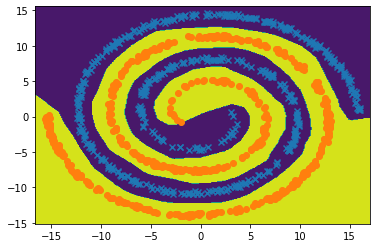

In [5]:
def contour_plot(classifier, x2d, y2d):
    z_plot = classifier.predict(np.c_[x2d.ravel(),y2d.ravel()]).reshape(x2d.shape)
    plt.contourf(x2d,y2d,z_plot)
def make_meshgrid(x, y, h=0.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
x_plot, y_plot = make_meshgrid(X_train_syn[:,0], X_train_syn[:,1])
contour_plot(classifier,x_plot,y_plot)
plt.scatter(X_dev_syn[:500,0],X_dev_syn[:500,1],marker="x")
plt.scatter(X_dev_syn[500:,0],X_dev_syn[500:,1],marker="o")
plt.show()

## Applying Principal Component Analysis on Data

In [20]:
# Loading Data
with open("Data/Pickles/synth_pca_train_np_X.pkl","rb") as f:
    X_train_syn_pca = pickle.load(f)
with open("Data/Pickles/synth_pca_train_np_y.pkl","rb") as f:
    y_train_syn_pca = np.squeeze(pickle.load(f))
with open("Data/Pickles/synth_pca_dev_np_X.pkl","rb") as f:
    X_dev_syn_pca = pickle.load(f)
with open("Data/Pickles/synth_pca_dev_np_y.pkl","rb") as f:
    y_dev_syn_pca = np.squeeze(pickle.load(f))

In [25]:
classifier = make_pipeline(StandardScaler(), nn.MLPClassifier(solver='adam', alpha=1e-3,hidden_layer_sizes=(20, 15, 10), max_iter=1000))

# Fit the data to X and y
classifier.fit(X_train_syn_pca,y_train_syn_pca)
preds = classifier.predict(X_dev_syn_pca)

In [29]:
# Calculate Accuracy:
errs = preds - y_dev_syn_pca
mistakes = np.count_nonzero(errs)
print(mistakes)
acc = 1 - mistakes/(len(y_dev_syn_pca))
print(f"Accuracy = {acc}")

0
Accuracy = 1.0


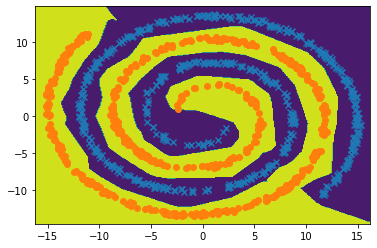

In [32]:
x_plot, y_plot = make_meshgrid(X_train_syn_pca[:,0], X_train_syn_pca[:,1])
contour_plot(classifier,x_plot,y_plot)
plt.scatter(X_dev_syn_pca[:500,0],X_dev_syn_pca[:500,1],marker="x")
plt.scatter(X_dev_syn_pca[500:,0],X_dev_syn_pca[500:,1],marker="o")
plt.show()

## Applying Fischer Linear Discriminant Analysis on Data

In [33]:
# Loading Data
with open("Data/Pickles/synth_lda_train_np_X.pkl","rb") as f:
    X_train_syn_lda = pickle.load(f)
with open("Data/Pickles/synth_lda_train_np_y.pkl","rb") as f:
    y_train_syn_lda = np.squeeze(pickle.load(f))
with open("Data/Pickles/synth_lda_dev_np_X.pkl","rb") as f:
    X_dev_syn_lda = pickle.load(f)
with open("Data/Pickles/synth_lda_dev_np_y.pkl","rb") as f:
    y_dev_syn_lda = np.squeeze(pickle.load(f))

In [ ]:
classifier = make_pipeline(StandardScaler(), nn.MLPClassifier(solver='adam', alpha=1e-3,hidden_layer_sizes=(20, 15, 10), max_iter=1000))

# Fit the data to X and y
classifier.fit(X_train_syn_pca,y_train_syn_pca)
preds = classifier.predict(X_dev_syn_pca)

# Artificial Neural Networks on Image Features

In [ ]:
# Take command line args
# feature type - normal, LDA, PCA
# dataset - Image, Synthetic, IsolatedDigits, HandwrittenCharacters